# Hazard: Tropical cyclones

Tropical cyclones tracks are gathered in the class `TCTracks` and then provided to the hazard `TropCyclone` which computes the wind gusts at each centroid. `TropCyclone` inherits from `Hazard` and has an associated hazard type `TC`.

#### What do tropical cyclones look like in CLIMADA?

`TCTracks` reads and handles historical tropical cyclone tracks of the [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) repository or synthetic tropical cyclone tracks simulated using fully statistical or coupled statistical-dynamical modeling approaches. It also generates synthetic tracks from the historical ones using Wiener processes.

The tracks are stored in the attribute `data`, which is a list of `xarray`'s `Dataset` (see [xarray.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html)). Each `Dataset` contains the following variables:

| Coordinates|
| :- |
| time |
| latitude |
| longitude |

| Descriptive variables |
| :- | 
| time_step |
| radius_max_wind |
| max_sustained_wind |
| central_pressure |
| environmental_pressure |

| Attributes|
| :- | 
| max_sustained_wind_unit |
| central_pressure_unit |
| sid |
| name |
| orig_event_flag |
| data_provider |
| basin |
| id_no |
| category |
<br>

### How is this tutorial structured?

[**Part 1: Load TC tracks**](#Part1)

<ol>

[**a) Load TC tracks from historical records**](#Part1.a)

[**b) Generate probabilistic events**](#Part1.b) 
    
[**c) ECMWF Forecast Tracks**](#Part1.c)    

[**d) Load TC tracks from other sources**](#Part1.d) 

</ol>

[**Part 2: `TropCyclone()` class**](#Part2) 

<ol>

[**a) Default hazard generation for tropical cyclones**](#Part2.a)

[**b) Implementing climate change**](#Part2.b)

[**c) Multiprocessing - improving performance for big computations**](#Part2.c)

[**d) Making videos**](#Part2.d)
    
</ol>

<a id='Part1'></a> 
## Part 1: Load TC tracks

Records of historical TCs are very limited and therefore the database to study this natural hazard remains sparse. Only a small fraction of the TCs make landfall every year and reliable documentation of past TC landfalling events has just started in the 1950s (1980s - satellite era). The generation of synthetic storm tracks is an important tool to overcome this spatial and temporal limitation. Synthetic dataset are much larger and thus allow to estimate the risk of much rarer events. Here we show the most prominent tools in CLIMADA to load TC tracks from historical records [a)](#Part1.a), generate a probabilistic dataset thereof [b)](#Part1.b), and work with model simulations [c)](#Part1.c).

<a id='Part1.a'></a> 
## a) Load TC tracks from historical records

The best-track historical data from the International Best Track Archive for Climate Stewardship ([IBTrACS](https://www.ncdc.noaa.gov/ibtracs/)) can easily be loaded into CLIMADA to study the historical records of TC events. The method `read_ibtracs_netcdf()` generates the `Datasets` for tracks selected by [IBTrACS](https://www.ncdc.noaa.gov/ibtracs/) id, or by basin and year range. To achieve this, it downloads the first time the [IBTrACS data v4 in netcdf format](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/IBTrACS.ALL.v04r00.nc) and stores it in `climada_python/data/system`. The tracks can be accessed later either using the attribute `data` or using `get_track()`, which allows to select tracks by its name or id. Use the method `append()` to extend the `data` list.

If you get an error downloading the IBTrACS data, try to manually access [ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/](ftp://eclipse.ncdc.noaa.gov/pub/ibtracs//v04r00/provisional/netcdf/), connect as a *Guest* and copy the file `IBTrACS.ALL.v04r00.nc` to `climada_python/data/system`.

To visualize the tracks use `plot()`.


2021-01-14 09:56:13,653 - climada - DEBUG - Loading default config file: /Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/conf/defaults.conf
2021-01-14 09:56:15,561 - climada.hazard.tc_tracks - INFO - Progress: 100%


/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2021-01-14 09:56:16,290 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, 1993271N14134, 1993285N12192, 1993285N16239, 1994128N04155, 1994212N11240, 1994221N15215, 1994224N16240, 1994249N11200, 1994272N40159, 1994273N08176, 1994291N12170, 1994294N13203, 1994295N25188, 1994348N04175.
2021-01-14 09:56:16,405 - climada.hazard.tc_tracks - INFO - Progress: 11%
2021-01-14 09:56:16,498 - climada.hazard.tc_tracks - INFO - Progress: 23%
2021-01-14 09:56:16,589 - climada.hazard.tc_tracks - INFO - Progress: 35%
2021-01-14 09:56:16,681 - climada.hazard.tc_tracks - INFO - Progress: 47%
2021-01-14 09:56:16,773 - climada.hazard.tc_tracks - INFO - Progress: 58%
2021-01-14 09:56:16,877 - climada.hazard.tc_tracks - INFO - Progress: 70%
2021-01-14 09:56:17,009 - climada.hazard.tc_tracks - INFO - Progress: 82%
2021-01-14 09:56:17,100 - climada.hazard.tc_tracks - INFO - Progress: 94%
2021-01-14 09:56:17,

/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


2021-01-14 09:56:17,968 - climada.hazard.tc_tracks - INFO - Progress: 100%
2021-01-14 09:56:18,245 - climada.hazard.tc_tracks - INFO - Progress: 100%


/Users/simonameiler/Documents/WCR/CLIMADA_develop/climada_python/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/Users/simonameiler/opt/anaconda3/envs/climada_env/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:225: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **dict(style))


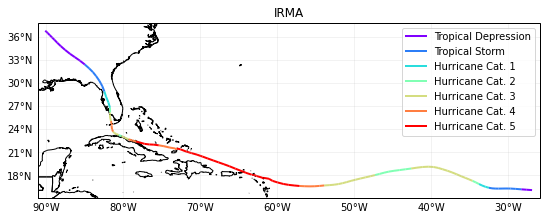

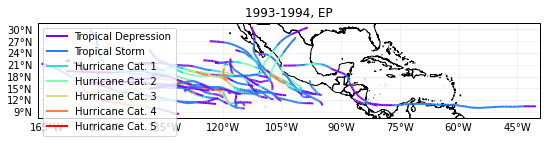

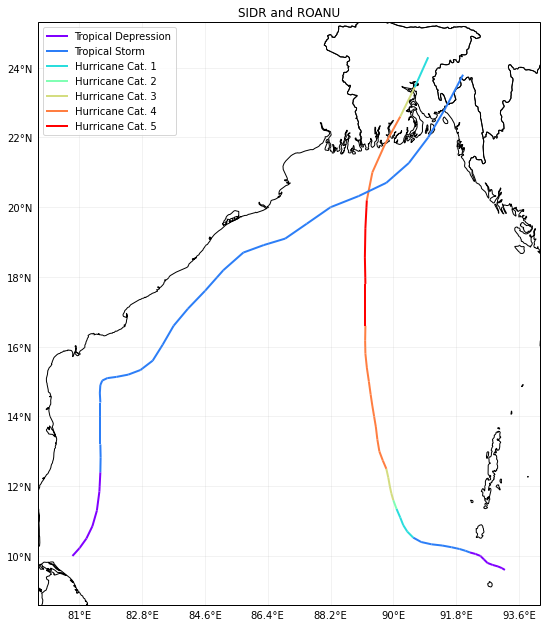

In [1]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks()
tr_irma.read_ibtracs_netcdf(provider='usa', storm_id='2017242N16333') # IRMA 2017
ax = tr_irma.plot()
ax.set_title('IRMA') # set title

# other ibtracs selection options
from climada.hazard import TCTracks
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP. 
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('1993-1994, EP') # set title

track1 = TCTracks()
track1.read_ibtracs_netcdf(provider='usa', storm_id='2007314N10093') # SIDR 2007
track2 = TCTracks()
track2.read_ibtracs_netcdf(provider='usa', storm_id='2016138N10081') # ROANU 2016
track1.append(track2.data) # put both tracks together
ax = track1.plot()
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('SIDR and ROANU'); # set title

In [2]:
tr_irma.get_track('2017242N16333')

<xarray.Dataset>
Dimensions:                 (time: 123)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lat                     (time) float32 16.1 16.147842 ... 36.495224 36.8
    lon                     (time) float32 -26.9 -27.592503 ... -89.794334 -90.1
Data variables:
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    radius_max_wind         (time) float32 60.0 60.0 60.0 ... 60.0 60.0 60.0
    radius_oci              (time) float32 180.0 180.0 180.0 ... 350.0 350.0
    max_sustained_wind      (time) float32 30.0 32.0 35.0 ... 15.0 15.0 15.0
    central_pressure        (time) float32 1008.0 1007.0 ... 1004.0 1005.0
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     IRMA
    sid:                      2017242N16333
    orig_event_flag:          True
    data_provider

<a id='Part1.b'></a> 
## b) Generate probabilistic events

Once tracks are present in `TCTracks`, one can generate synthetic tracks for each present track based on directed random walk. Note that the tracks should be interpolated to use the same timestep **before** generation of probabilistic events.

`calc_perturbed_trajectories()` generates an ensemble of "nb_synth_tracks" numbers of synthetic tracks is computed for every track.
The methodology perturbs the tracks locations, and if decay is `True` it additionally includes decay of wind speed and central pressure drop after landfall. No other track parameter is perturbed.

2021-01-14 09:56:23,034 - climada.hazard.tc_tracks - INFO - Interpolating 1 tracks to 1h time steps.
2021-01-14 09:56:23,719 - climada.hazard.tc_tracks_synth - INFO - Computing 5 synthetic tracks.


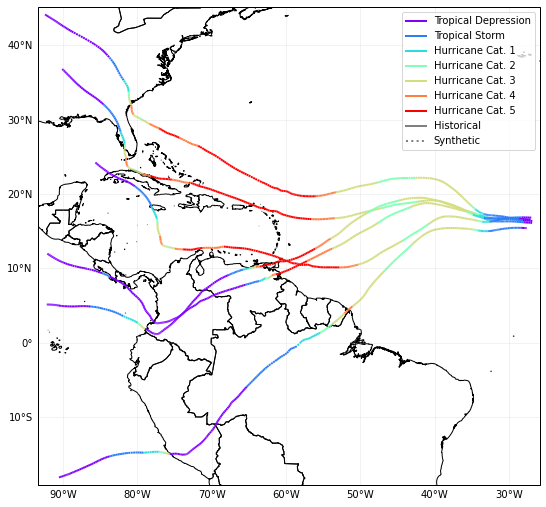

In [3]:
# here we use tr_irma retrieved from IBTrACS with the function above
# select number of synthetic tracks (nb_synth_tracks) to generate per present tracks. 
tr_irma.equal_timestep()
tr_irma.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_irma.plot()
# see more configutration options (e.g. amplitude of max random starting point shift in decimal degree; max_shift_ini)

In [4]:
tr_irma.data[-1] # last synthetic track. notice the value of orig_event_flag and name

<xarray.Dataset>
Dimensions:                 (time: 349)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-30 ... 2017-09-13T12:00:00
    lon                     (time) float64 -27.64 -27.8 -27.96 ... -90.4 -90.54
    lat                     (time) float64 15.39 15.41 15.42 ... -18.09 -18.13
Data variables:
    time_step               (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    radius_max_wind         (time) float64 60.0 60.0 60.0 ... 60.0 60.0 60.0
    radius_oci              (time) float64 180.0 180.0 180.0 ... 350.0 350.0
    max_sustained_wind      (time) float64 30.0 30.67 31.33 ... 15.0 15.0 15.0
    central_pressure        (time) float64 1.008e+03 1.008e+03 ... 1.005e+03
    environmental_pressure  (time) float64 1.012e+03 1.012e+03 ... 1.008e+03
    on_land                 (time) bool False False False ... False False False
    dist_since_lf           (time) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    max_sustained_wind_unit:  kn


### EXERCISE

Using the first synthetic track generated,

1. Which is the time frequency of the data?
2. Compute the maximum sustained wind for each day.

In [5]:
# Put your code here





In [6]:
# SOLUTION:
import numpy as np
# select the track
tc_syn = tr_irma.get_track('2017242N16333_gen1')

# 1. Which is the time frequency of the data?
# The values of a DataArray are numpy.arrays. 
# The nummpy.ediff1d computes the different between elements in an array
diff_time_ns = np.ediff1d(tc_syn.time)
diff_time_h = diff_time_ns.astype(int)/1000/1000/1000/60/60
print('Mean time frequency in hours:', diff_time_h.mean())
print('Std time frequency in hours:', diff_time_h.std())
print()

# 2. Compute the maximum sustained wind for each day.
print('Daily max sustained wind:', tc_syn.max_sustained_wind.groupby('time.day').max())

Mean time frequency in hours: 1.0
Std time frequency in hours: 0.0

Daily max sustained wind: <xarray.DataArray 'max_sustained_wind' (day: 15)>
array([100.        , 100.        , 100.        , 123.33333333,
       155.        , 155.        , 150.        , 144.        ,
       145.        , 115.        ,  80.        ,  35.        ,
        15.        ,  54.        ,  99.        ])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 30 31


<a id='Part1.c'></a> 
## c) ECMWF Forecast Tracks

ECMWF publishes tropical cyclone forecast tracks free of charge as part of the [WMO essentials](https://www.ecmwf.int/en/forecasts/datasets/wmo-essential#Essential_Tropical). These tracks are detected automatically in the ENS and HRES models. The non-supervised nature of the model may lead to artefacts.

The `tc_fcast` trackset below inherits from TCTracks, but contains some additional metadata that follows ECMWF's definitions. Try plotting these tracks and compare them to the official [cones of uncertainty](https://www.ecmwf.int/en/forecasts/charts/tcyclone/)! The example track at `tc_fcast.data[0]` shows the data structure.

In [7]:
from climada.hazard import TCForecast

tc_fcast = TCForecast()
tc_fcast.fetch_ecmwf()

print(tc_fcast.data[0])

2021-01-14 09:56:32,753 - climada.hazard.tc_tracks_forecast - INFO - Fetching BUFR tracks:


Processing: 100%|██████████| 37/37 [00:07<00:00,  4.65files/s]

<xarray.Dataset>
Dimensions:                 (environmental_pressure: 7, radius_max_wind: 7, time: 7)
Coordinates:
    lat                     (time) float64 -24.49 -24.99 -24.99 ... -21.2 -21.8
    lon                     (time) float64 174.5 174.9 175.3 ... 159.7 160.1
  * time                    (time) datetime64[ns] 2021-01-22T12:00:00 ... 2021-01-24
  * radius_max_wind         (radius_max_wind) float64 nan nan nan ... nan nan
  * environmental_pressure  (environmental_pressure) float64 1.01e+03 ... 1.01e+03
Data variables:
    max_sustained_wind      (time) float64 19.1 19.1 15.0 15.4 16.0 13.4 14.4
    central_pressure        (time) float64 1e+03 999.1 ... 1.006e+03 1.007e+03
    time_step               (time) int64 204 6 6 6 6 6 6
Attributes:
    max_sustained_wind_unit:  m/s
    central_pressure_unit:    mb
    name:                     73P
    sid:                      73P
    orig_event_flag:          False
    data_provider:            ECMWF
    id_no:                    1.0

<a id='Part1.d'></a> 
## d) Load TC tracks from other sources

In addition to the [historical records of TCs (IBTrACS)](#Part1.a), the [probabilistic extension](#Part1.b) of these tracks, and the [ECMWF Forecast tracks](#Part1.c), CLIMADA also features functions to read in synthetic TC tracks from other sources. These include synthetic storm tracks from Kerry Emanuel's coupled statistical-dynamical model (Emanuel et al., 2006 as used in Geiger et al., 2016), synthetic storm tracks from a second coupled statistical-dynamical model (CHAZ) (as described in Lee et al., 2018), and synthetic storm tracks from a fully statistical model (STORM) Bloemendaal et al., 2020). However, these functions are partly under development and/or targeted at advanced users of CLIMADA in the context of very specific use cases. They are thus not covered in this tutorial.

<a id='Part2'></a> 
## Part 2: TropCyclone() class

The `TropCyclone` class is a derived class of [Hazard](climada_hazard_Hazard.ipynb). As such, it contains all the attributes and methods of a `Hazard`. Additionally, it contains the method `set_from_tracks()` to model tropical cyclones from tracks contained in a `TCTracks` instance. 

When setting tropical cyclones from tracks, the centroids where to map the wind gusts (the hazard intensity) can be provided. If no centroids are provided, the global centroids `GLB_NatID_grid_0360as_adv_2.mat` are used. 

From the track properties the 1 min sustained peak gusts are computed in each centroid as the sum of a circular wind field (following Holland, 2008) and the translational wind speed that arises from the storm movement. We incorporate the decline of the translational component from the cyclone centre by multiplying it by an attenuation factor. See [CLIMADA v1](https://www.geosci-model-dev.net/12/3085/2019/) and references therein for more information.

<a id='Part2.a'></a> 
## a) Default hazard generation for tropical cyclones

2021-01-14 09:56:49,994 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2021-01-14 09:56:50,553 - climada.util.coordinates - INFO - dist_to_coast: UTM 32618 (1/3)
2021-01-14 09:56:50,978 - climada.util.coordinates - INFO - dist_to_coast: UTM 32619 (2/3)
2021-01-14 09:56:51,848 - climada.util.coordinates - INFO - dist_to_coast: UTM 32620 (3/3)
2021-01-14 09:56:52,452 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2021-01-14 09:56:52,924 - climada.hazard.trop_cyclone - INFO - Progress: 16%
2021-01-14 09:56:53,050 - climada.hazard.trop_cyclone - INFO - Progress: 33%
2021-01-14 09:56:53,070 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2021-01-14 09:56:53,529 - climada.hazard.trop_cyclone - INFO - Progress: 66%
2021-01-14 09:56:53,561 - climada.hazard.trop_cyclone - INFO - Progress: 83%


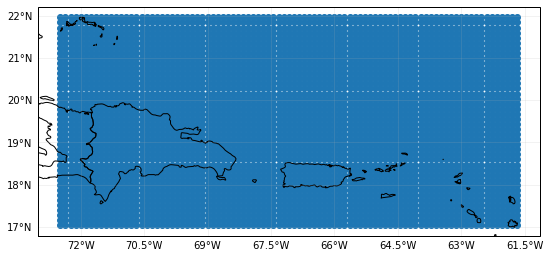

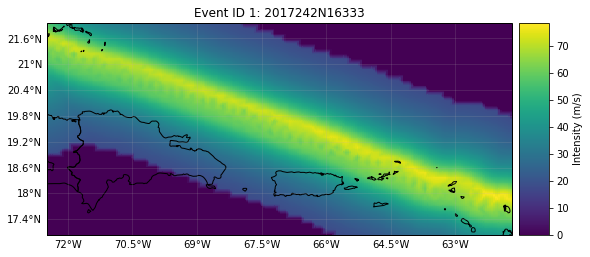

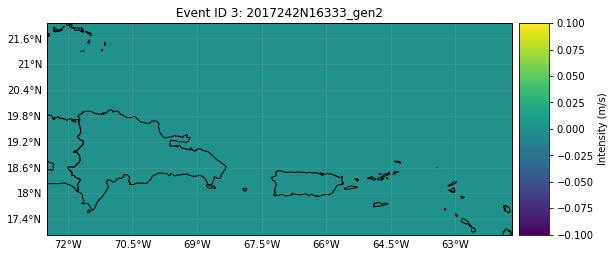

In [8]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 16.99375, 21.95625, -72.48125, -61.66875
cent = Centroids()
cent.set_raster_from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.12)
cent.check()
cent.plot()

# construct tropical cyclones
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
#tc_irma.set_from_tracks(tr_irma) # try without given centroids
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')      # IRMA
tc_irma.plot_intensity('2017242N16333_gen2') # IRMA's synthetic track 2

<a id='Part2.b'></a> 
## b) Implementing climate change

`set_climate_scenario_knu` implements the changes on intensity and frequency due to climate change described in *Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios* of Knutson et al 2015. Other RCP scenarios are approximated from the RCP 4.5 values by interpolating them according to their relative radiative forcing.

2021-01-14 09:56:56,806 - climada.hazard.trop_cyclone - INFO - Mapping 6 tracks to 3822 centroids.
2021-01-14 09:56:57,304 - climada.hazard.trop_cyclone - INFO - Progress: 16%
2021-01-14 09:56:57,437 - climada.hazard.trop_cyclone - INFO - Progress: 33%
2021-01-14 09:56:57,456 - climada.hazard.trop_cyclone - INFO - Progress: 50%
2021-01-14 09:56:57,913 - climada.hazard.trop_cyclone - INFO - Progress: 66%
2021-01-14 09:56:57,947 - climada.hazard.trop_cyclone - INFO - Progress: 83%


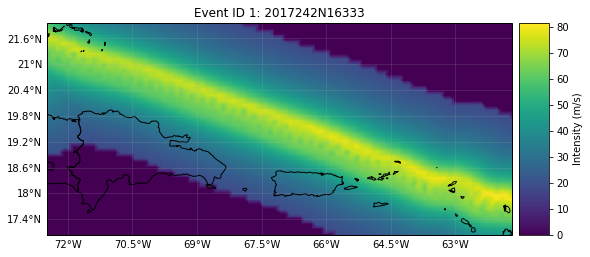

In [9]:
# an Irma event-like in 2055 under RCP 4.5:
tc_irma = TropCyclone()
tc_irma.set_from_tracks(tr_irma, centroids=cent)
tc_irma_cc = tc_irma.set_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_irma_cc.plot_intensity('2017242N16333')

**Note:** this method to implement climate change is simplified and does only take into account changes in TC frequency and intensity. However, how hurricane damage changes with climate remains challenging to assess. Records of hurricane damage exhibit widely fluctuating values because they depend on rare, landfalling events which are substantially more volatile than the underlying basin-wide TC characteristics. For more accurate future projections of how a warming climate might shape TC characteristics, there is a two-step process needed. First, the understanding of how climate change affects critical environmental factors (like SST, humidity, etc.) that shape TCs is required. Second, the means of simulating how these changes impact TC characteristics (such as intensity, frequency, etc.) are necessary. Statistical-dynamical models (Emanuel et al., 2006 and Lee et al., 2018) are physics-based and allow for such climate change studies. However, this goes beyond the scope of this tutorial.

<a id='Part2.c'></a> 
## c) Multiprocessing - improving performance for big computations

**WARNING**: <br>
Uncomment and execute these lines in a console, outside Jupyter Notebook.<br>
<br>
Multiprocessing is implemented in the tropical cyclones. Simply provide pool in the constructor. When dealing with a big amount of data, you might consider using it as follows:

In [10]:
#from climada.hazard import TCTracks, Centroids, TropCyclone
#from pathos.pools import ProcessPool as Pool

#pool = Pool() # start a pathos pool

#tc_track = TCTracks(pool)  # provide the pool in the constructor   
#tc_track.read_ibtracs_netcdf(provider='usa', year_range=(1992, 1994), basin='EP')
#tc_track.calc_perturbed_trajectories() # OPTIONAL: if you want to generate a probabilistic set of TC tracks.
#tc_track.equal_timestep()

#lon_min, lat_min, lon_max, lat_max = -160, 10, -100, 36
#centr = Centroids()
#centr.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.1)

#tc_haz = TropCyclone(pool) # provide the pool in the constructor   
#tc_haz.set_from_tracks(tc_track, centr)
#tc_haz.check()

#pool.close()
#pool.join()

<a id='Part2.d'></a> 
## d) Making videos
**WARNING**: <br>
Uncomment and execute these lines in a console, outside Jupyter Notebook.<br>

Videos of a tropical cyclone hitting specific centroids are done automatically using the method `video_intensity()`.

In [11]:
#lon_min, lat_min, lon_max, lat_max = -83.5, 24.4, -79.8, 29.6
#centr_video = Centroids()
#centr_video.set_raster_from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
#centr_video.check()

#track_name = '2017242N16333' # '2016273N13300' # '1992230N11325'
#tc_video = TropCyclone()
# use file_name='' to not to write the video
#tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif')
# tc_list contains a list with TropCyclone instances plotted at each time step
# tr_coord contains a list with the track path coordinates plotted at each time step

# mp4 occupies much less space! To use it:
# conda install ffmpeg
# in code:
# plt.rcParams['animation.ffmpeg_path']='path/to/climada_env/bin/ffmpeg'
# writer=animation.FFMpegWriter(bitrate=500)
# tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, file_name='./results/irma_tc_fl.gif', writer=writer)

### REFERENCES:

- Bloemendaal, N., Haigh, I. D., de Moel, H., Muis, S., Haarsma, R. J., & Aerts, J. C. J. H. (2020). Generation of a global synthetic tropical cyclone hazard dataset using STORM. Scientific Data, 7(1). https://doi.org/10.1038/s41597-020-0381-2

- Emanuel, K., S. Ravela, E. Vivant, and C. Risi, 2006: A Statistical Deterministic Approach to Hurricane Risk Assessment. Bull. Amer. Meteor. Soc., 87, 299–314, https://doi.org/10.1175/BAMS-87-3-299.

- Geiger, T., Frieler, K., & Levermann, A. (2016). High-income does not protect against hurricane losses. Environmental Research Letters, 11(8). https://doi.org/10.1088/1748-9326/11/8/084012

- Knutson, T. R., Sirutis, J. J., Zhao, M., Tuleya, R. E., Bender, M., Vecchi, G. A., … Chavas, D. (2015). Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios. Journal of Climate, 28(18), 7203–7224. https://doi.org/10.1175/JCLI-D-15-0129.1

- Lee, C. Y., Tippett, M. K., Sobel, A. H., & Camargo, S. J. (2018). An environmentally forced tropical cyclone hazard model. Journal of Advances in Modeling Earth Systems, 10(1), 223–241. https://doi.org/10.1002/2017MS001186